In [1]:
import numpy as np
import numpy.linalg as LA
import pandas as pd

In [2]:
%pylab
%matplotlib inline

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [3]:
parametros = np.array([0, -2.00158510637908252240537862224, 0.994, 0])
xend = 17.0652165601579625588917206249
T = [0, xend]

In [4]:
def f (T, parametros):
    m = 0.012277471
    u1 = parametros [0]
    u2 = parametros [1]
    y1 = parametros [2]
    y2 = parametros [3]
    f1 = y1 + 2*u2 - (1-m)*((y1+m)/(((y1+m)**2)+(y2**2))**(3/2)) - m*((y1-(1-m))/((((y1-(1-m))**2)+y2**2)**(3/2)))
    f2 = y2-2*u1-(1-m)*(y2/((((y1+m)**2)+y2**2)**(3/2))) - m*(y2/((((y1-(1-m))**2)+y2**2)**(3/2)))
    f3 = u1
    f4 = u2
    return np.array([f1, f2, f3, f4])

# Intento1

In [5]:
def TEVecUnPaso (T, f, parametros, h):
    return np.array(f(T, parametros) + 0.5*h*(f(T, parametros) + f(T+h, f(T, parametros) + h*f(T, parametros))))

In [6]:
def RK4VecUnPaso (T, f, parametros, h:float):
    #parametros = [u1, u2, y1, y2]
    s1 = np.array([])
    s2 = np.array([])
    s3 = np.array([])
    s4 = np.array([])
    s1 = f(T, parametros)
    print(s1)
    s2 = f(T + h/2, parametros + (h/2)*s1)
    print(s2)
    s3 = f(T + h/2, parametros + (h/2)*s2)
    print(s3)
    s4 = f(T + h, parametros + h*s3)
    print(s4)
    print(f(T, parametros) + (h/6)*(s1 + 2*s2 + 2*s3 + s4))
    return f(T, parametros) + (h/6)*(s1 + 2*s2 + 2*s3 + s4)

In [26]:
def pasoFlexLLama (f, wp, tp, tmax, tol):
    trel = tol * max(LA.norm([wp], np.inf), 0.25)
    i = 0
    H = tmax - tp
    hs = []
    hs.append(H)
    while True:
        EH = abs(RK4VecUnPaso(tp, f, wp, hs[i]) - TEVecUnPaso(tp, f, wp, hs[i]))
        if any(EH) < trel:
            break
        hs.append(hs[i]/2)
        i = i+1
    tf = tp + hs[len(hs)-1]
    wf = RK4VecUnPaso(tf, f, wp, hs[len(hs)-1])
    Hsug = 2*hs[len(hs)-1]
    return tf, wf, Hsug

In [31]:
def metodoAdap (T, f, parametros, Hmax, tol, imax):
    tp = T[0]
    Hsug = Hmax
    wp = f(T, parametros)
    w = [[0 for i in range (0, imax)] for i in range (0,4)]
    i = 0
    while True:
        tmax = min(T[1], tp+Hsug)
        tf, wf, Hsug = pasoFlexLLama(f, tp, wp, tmax, tol) #wf y tf igual son arrays
        Hsug = min(Hmax, Hsug)
        w[0][i]=wf[0]
        w[1][i]=wf[1]
        w[2][i]=wf[2]
        w[3][i]=wf[3]
        if tf == T[1]:
            break
        if i>=imax-1:
            break
        tp = tf
        wp = wf
        i = i+1
    return w

# Intento 2

In [18]:
def pasoFlex(f, tp, wp, tmax, tol=1e-6 ):
    trel = tol*max( LA.norm(wp, np.inf), 0.25 )
    tf = tmax
    
    while True:
        H = tf - tp
        s1 = f(tp, wp)
        s2 = f(tp+(H/2), wp + (H/2)*s1)
        s3 = f(tp+ (H/2), wp + (H/2)*s2)
        s4 = f(tp+H, wp+H*s3)
        EH = H*abs((H/6)*(s1 + 2*s2 + 2*s3 + s4))
        
        if any(EH > trel):                                         # was all(...)
            tf -= 0.5*H
        else:
            wnew = f(tp, wp) + (H/6)*(s1 + 2*s2 + 2*s3 + s4)
            #unew = wp + H*(s1 + 4*s3 + s2)/6
            Hsug = 2*H
            break
    
    return tf, wnew, Hsug

In [19]:
def metAdap( f, u0, I, Hmax, tol =1e-6):
    t0, T = I
    Hsug = Hmax
    wp = u0.copy()
    tp = t0
    
    ts = [t0]
    ws = [wp]
    
    while ts[-1] < T:
        tmax = min(T, ts[-1]+Hsug)
        tf, wf, Hsug = pasoFlex( f, ts[-1], ws[-1], tmax, tol )
        Hsug = min(Hmax, Hsug)
        
        ts.append(tf)
        ws.append(wf)
    
    return ts, np.array(ws)  

In [20]:
a=metAdap(f, parametros, T, 1/2, 1e-6)

In [21]:
x = [a[1][i][2] for i in range (0, len(a[1]))]
y = [a[1][i][3] for i in range (0, len(a[1]))]
xx = [a[1][i][0] for i in range (0, len(a[1]))]
yy = [a[1][i][1] for i in range (0, len(a[1]))]

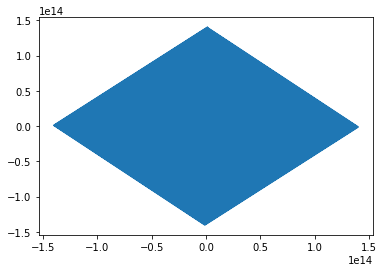

In [25]:
plot(x,y)